In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflowjs as tfjs
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.manifold import TSNE

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [42]:
x_test[0].shape

(28, 28, 1, 1)

In [43]:
y_train.shape

(60000,)

In [44]:
y_test.shape

(10000,)

<AxesSubplot:ylabel='Count'>

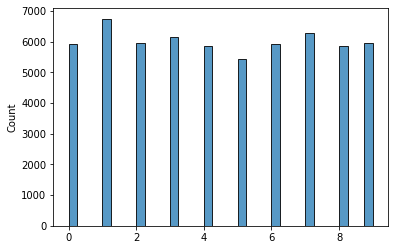

In [74]:
sns.histplot(y_train)

In [61]:
# Sample from the training set
sample_size = 8000

np.random.seed(86)
idx = np.random.choice(60000, size=sample_size, replace=False)
train_sample = x_train.reshape(60000, -1)[idx, :]
label_sample = y_train[idx]

# Generate 2D embedding with TSNE
embeddings = TSNE(verbose=2).fit_transform(train_sample)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.005s...
[t-SNE] Computed neighbors for 8000 samples in 2.557s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.765s
[t-SNE] Iteration 50: error = 94.5040588, gradient norm = 0.0011100 (50 iterations in 2.316s)
[t-SNE] Iteration 100: error = 86.6986237, gradient norm = 0.0014945 (50 iterations in 2.690s)
[t-SNE] Iteration 150: error = 86.0744781, gradient norm = 0

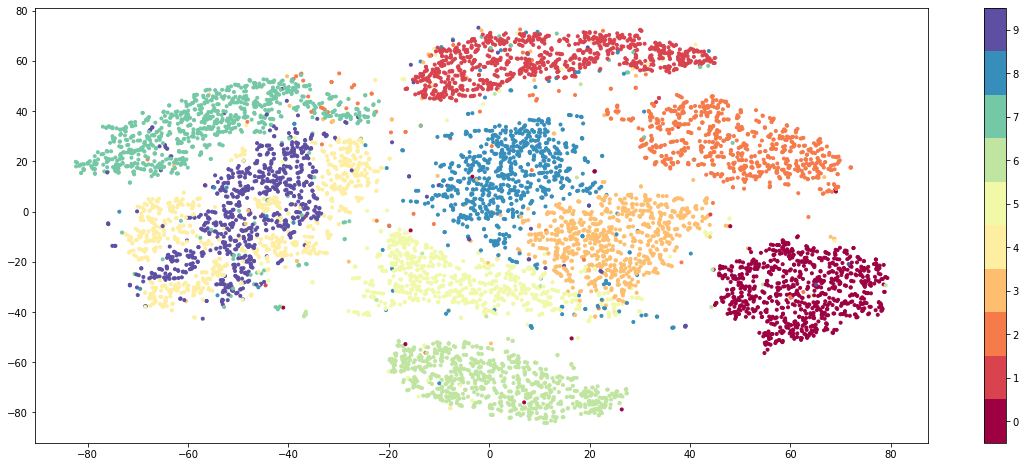

In [72]:
# Visualize TSNE embedding
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

plt.figure(figsize=(20, 8))
plt.scatter(vis_x, vis_y, c=label_sample, cmap=plt.cm.get_cmap("Spectral", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

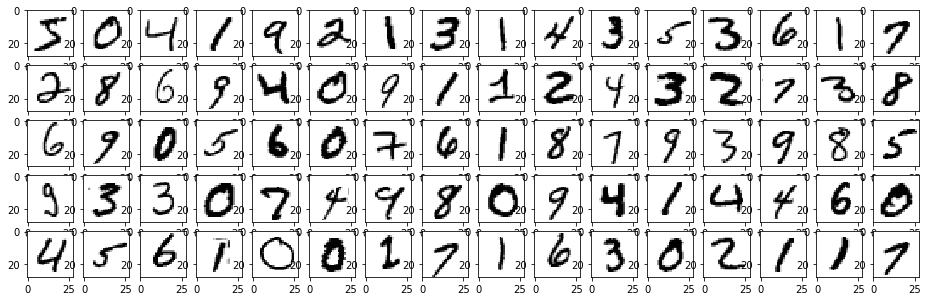

In [52]:
# preview the images first

def plot_mnist_images(data):
    plt.figure(figsize=(16, 10))
    x, y = 16, 10
    for i in range(80):  
        plt.subplot(y, x, i+1)
        plt.imshow(
            data[i].reshape((28,28)), 
            interpolation='nearest', 
            cmap=plt.get_cmap('binary')
        )
    plt.show()
    
plot_mnist_images(x_train)

In [53]:
# Normalize images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1, 1, 1, 1)
60000 train samples
10000 test samples


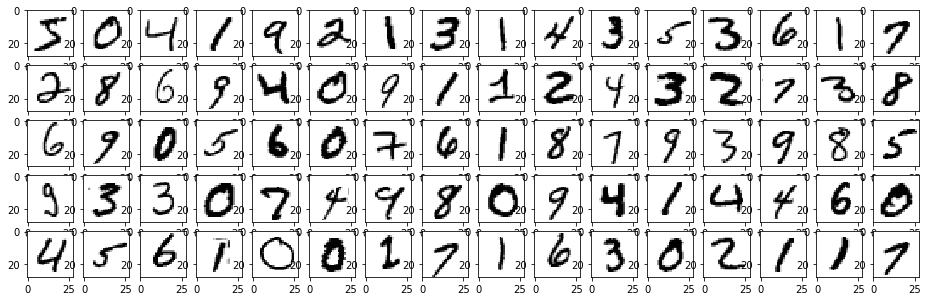

In [54]:
plot_mnist_images(x_train)

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [ ]:
batch_size = 128
epochs = 1
model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

In [ ]:
model.fit(
    x_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])